In [1]:
# Colab cell 1 - check GPU and basic python info
import torch, sys
print("Python:", sys.version)
print("Torch:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))


Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Torch: 2.9.0+cu126
CUDA available: True
GPU: Tesla T4


In [2]:
# Colab cell 2 - install packages
!pip install -q torch torchvision torchaudio --upgrade
!pip install -q numpy pandas matplotlib tqdm scikit-learn pillow opencv-python
# Optional (uncomment if you want advanced augmentation)
# !pip install -q albumentations
# Kaggle client to download dataset (optional)
!pip install -q kaggle


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 146.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.

In [3]:
# Colab cell 3 - mount Google Drive (optional)
from google.colab import drive
drive.mount('/content/drive')
# Example: create a project folder in your drive
!mkdir -p /content/drive/MyDrive/brain_mri_project


Mounted at /content/drive


In [15]:
!ls


brain-tumor-dataset.zip  drive	sample_data


In [17]:
!unzip -q brain-tumor-dataset.zip -d /content/brain_tumor


In [19]:
!ls

brain_tumor  brain-tumor-dataset.zip  drive  sample_data


In [20]:
!rm -rf /content/brain_mri   # remove old folder if exists
!unzip -q /content/brain-tumor-dataset.zip -d /content/brain_mri


In [21]:
import os

print("MAIN FOLDERS:", os.listdir('/content/brain_mri'))

print("\nTraining:", os.listdir('/content/brain_mri/Training'))
print("Testing:", os.listdir('/content/brain_mri/Testing'))


MAIN FOLDERS: ['Training', 'Testing']

Training: ['notumor', 'meningioma', 'glioma', 'pituitary']
Testing: ['notumor', 'meningioma', 'glioma', 'pituitary']


In [22]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [23]:
IMAGE_SIZE = 224   # Standard input for ResNet/DenseNet/EfficientNet
BATCH_SIZE = 32


In [24]:
train_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [25]:
test_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


# EDA

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter


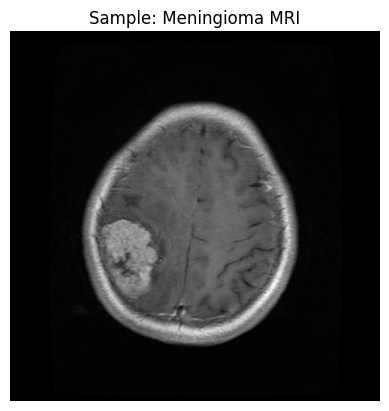

In [39]:
from PIL import Image
import matplotlib.pyplot as plt
import os

img_path = "/content/brain_mri/Training/meningioma/Tr-me_0011.jpg"

img = Image.open(img_path)

plt.imshow(img, cmap="gray")
plt.title("Sample: Meningioma MRI")
plt.axis("off")
plt.show()


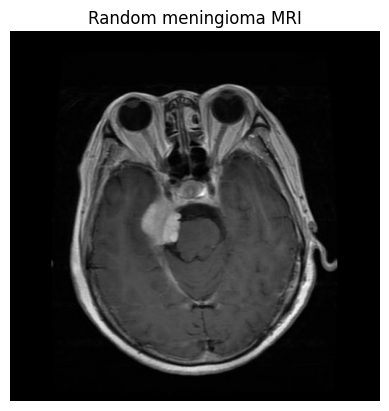

Loaded image: Tr-me_0849.jpg


In [40]:
import os, random
from PIL import Image
import matplotlib.pyplot as plt

cls = "meningioma"
folder = f"/content/brain_mri/Training/{cls}"

img_name = random.choice(os.listdir(folder))
img_path = os.path.join(folder, img_name)

img = Image.open(img_path)

plt.imshow(img, cmap="gray")
plt.title(f"Random {cls} MRI")
plt.axis("off")
plt.show()

print("Loaded image:", img_name)


In [27]:
TRAIN_DIR = "/content/brain_mri/Training"
TEST_DIR  = "/content/brain_mri/Testing"


In [28]:
def count_images(folder):
    class_counts = {}
    for cls in sorted(os.listdir(folder)):
        cls_path = os.path.join(folder, cls)
        if os.path.isdir(cls_path):
            class_counts[cls] = len(os.listdir(cls_path))
    return class_counts

train_counts = count_images(TRAIN_DIR)
test_counts  = count_images(TEST_DIR)

print("Training counts:", train_counts)
print("Testing counts:", test_counts)


Training counts: {'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}
Testing counts: {'glioma': 300, 'meningioma': 306, 'notumor': 405, 'pituitary': 300}


In [29]:
def count_images(folder):
    class_counts = {}
    for cls in sorted(os.listdir(folder)):
        cls_path = os.path.join(folder, cls)
        if os.path.isdir(cls_path):
            class_counts[cls] = len(os.listdir(cls_path))
    return class_counts

train_counts = count_images(TRAIN_DIR)
test_counts  = count_images(TEST_DIR)

print("Training counts:", train_counts)
print("Testing counts:", test_counts)


Training counts: {'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}
Testing counts: {'glioma': 300, 'meningioma': 306, 'notumor': 405, 'pituitary': 300}


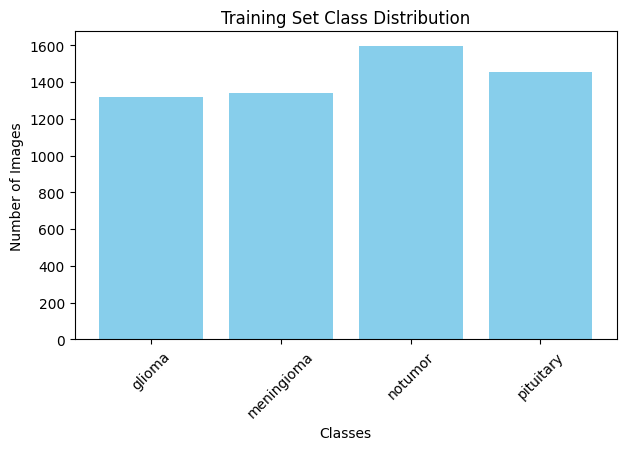

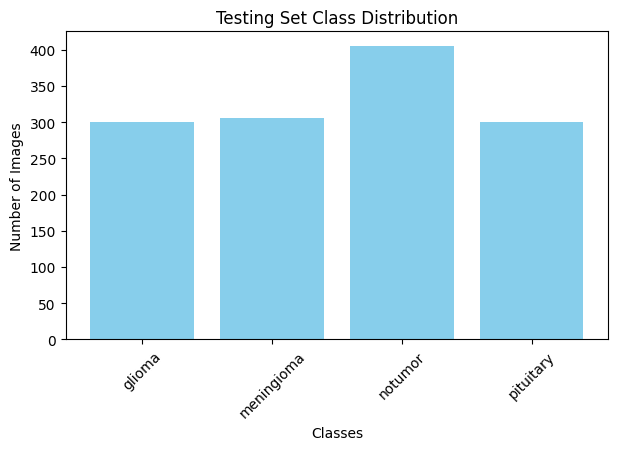

In [30]:
def plot_distribution(counts, title):
    classes = list(counts.keys())
    values = list(counts.values())

    plt.figure(figsize=(7,4))
    plt.bar(classes, values, color='skyblue')
    plt.title(title)
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45)
    plt.show()

plot_distribution(train_counts, "Training Set Class Distribution")
plot_distribution(test_counts,  "Testing Set Class Distribution")


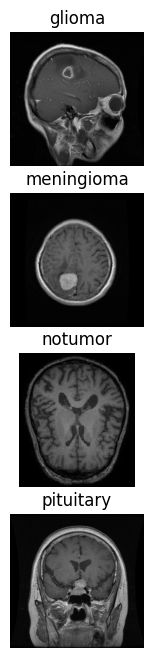

In [31]:
import random

def show_random_images(folder, n=4):
    plt.figure(figsize=(12, 8))

    classes = sorted(os.listdir(folder))

    for idx, cls in enumerate(classes):
        cls_folder = os.path.join(folder, cls)
        img_name = random.choice(os.listdir(cls_folder))
        img_path = os.path.join(cls_folder, img_name)

        img = Image.open(img_path)

        plt.subplot(len(classes), n, idx*n + 1)
        plt.imshow(img, cmap='gray')
        plt.title(cls)
        plt.axis("off")

show_random_images(TRAIN_DIR, n=3)


In [32]:
def get_avg_size(folder):
    widths, heights = [], []

    for cls in os.listdir(folder):
        cls_path = os.path.join(folder, cls)
        if os.path.isdir(cls_path):
            for img_name in os.listdir(cls_path):
                img_path = os.path.join(cls_path, img_name)
                try:
                    img = Image.open(img_path)
                    widths.append(img.size[0])
                    heights.append(img.size[1])
                except:
                    pass

    return np.mean(widths), np.mean(heights)

avg_w, avg_h = get_avg_size(TRAIN_DIR)
print(f"Average image size: {avg_w:.2f} x {avg_h:.2f}")


Average image size: 451.56 x 453.88


In [33]:
def check_corrupted(folder):
    corrupted = []
    for cls in os.listdir(folder):
        cls_path = os.path.join(folder, cls)
        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            try:
                Image.open(img_path).verify()
            except Exception as e:
                corrupted.append(img_path)
    return corrupted

bad_train = check_corrupted(TRAIN_DIR)
bad_test = check_corrupted(TEST_DIR)

print("Corrupted train images:", bad_train)
print("Corrupted test images:", bad_test)


Corrupted train images: []
Corrupted test images: []


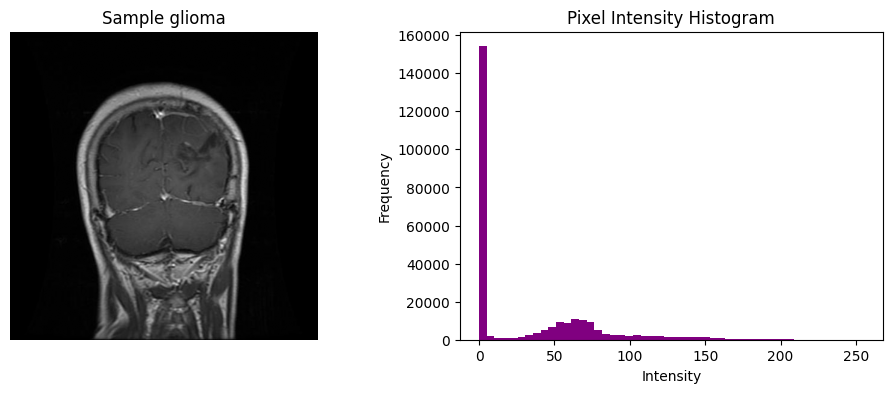

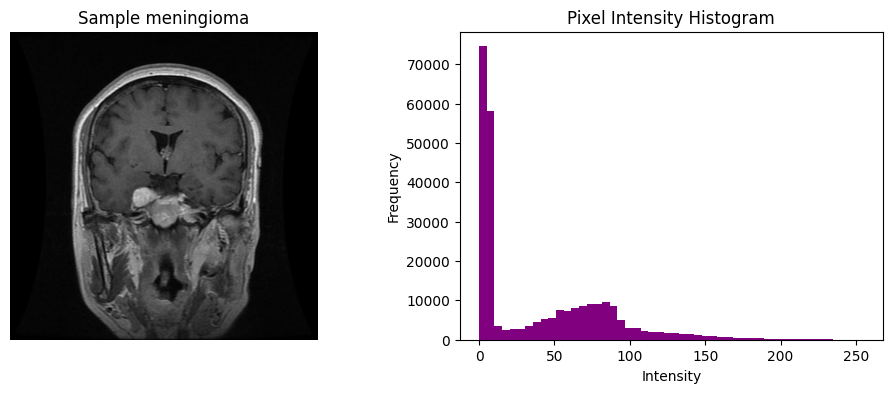

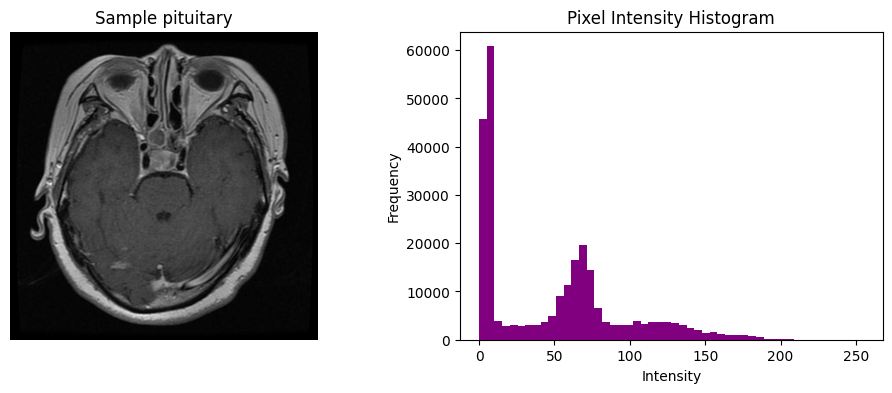

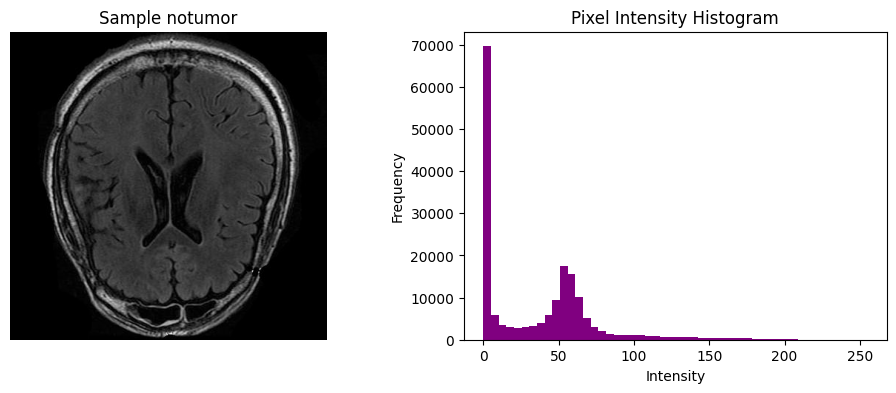

In [36]:
import cv2

def plot_histogram(folder, cls):
    cls_folder = os.path.join(folder, cls)
    img_name = random.choice(os.listdir(cls_folder))
    img_path = os.path.join(cls_folder, img_name)

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Sample {cls}")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.hist(img.ravel(), bins=50, color='purple')
    plt.title("Pixel Intensity Histogram")
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.show()

plot_histogram(TRAIN_DIR, "glioma")
plot_histogram(TRAIN_DIR, "meningioma")
plot_histogram(TRAIN_DIR, "pituitary")
plot_histogram(TRAIN_DIR, "notumor")



In [42]:
TRAIN_DIR = "/content/brain_mri/Training"
TEST_DIR  = "/content/brain_mri/Testing"

classes = sorted(os.listdir(TRAIN_DIR))
print("Classes:", classes)


Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


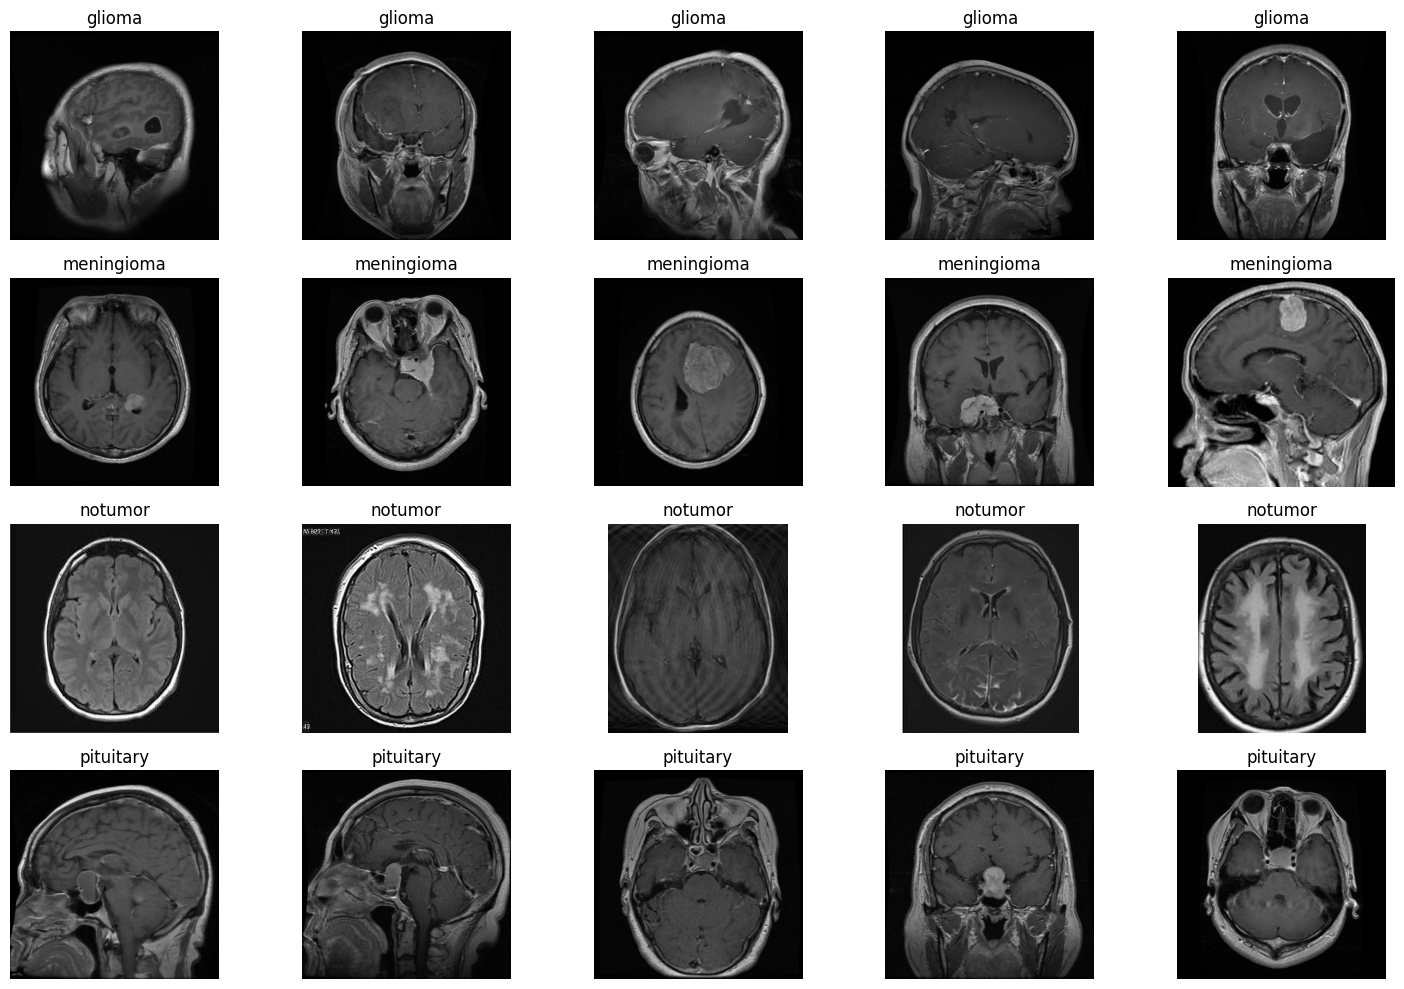

In [43]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

def visualize_class_samples(folder, classes, n_per_class=5):
    plt.figure(figsize=(15, 10))
    i = 1

    for cls in classes:
        cls_path = os.path.join(folder, cls)
        images = os.listdir(cls_path)
        random.shuffle(images)

        for img_name in images[:n_per_class]:
            img_path = os.path.join(cls_path, img_name)
            img = Image.open(img_path)

            plt.subplot(len(classes), n_per_class, i)
            plt.imshow(img, cmap='gray')
            plt.title(cls)
            plt.axis("off")
            i += 1

    plt.tight_layout()
    plt.show()

visualize_class_samples(TRAIN_DIR, classes, n_per_class=5)


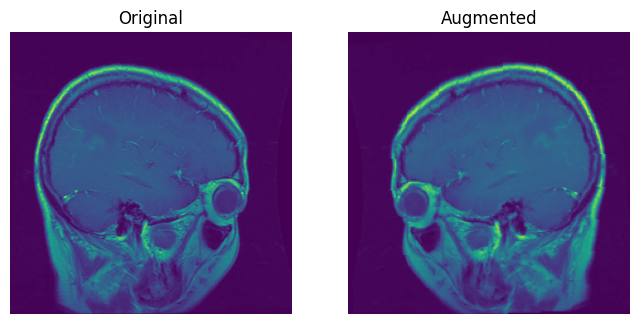

In [44]:
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

augment = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
])

to_tensor = transforms.ToTensor()

img_path = TRAIN_DIR + "/glioma/" + random.choice(os.listdir(TRAIN_DIR + "/glioma"))
img = Image.open(img_path)

augmented = augment(img)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(augmented)
plt.title("Augmented")
plt.axis("off")

plt.show()


In [45]:
import numpy as np

def avg_brightness(folder):
    values = []
    for img_name in os.listdir(folder):
        img = np.array(Image.open(os.path.join(folder, img_name)).convert("L"))
        values.append(img.mean())
    return np.mean(values)

for cls in classes:
    cls_path = os.path.join(TRAIN_DIR, cls)
    print(f"{cls} average brightness:", avg_brightness(cls_path))


glioma average brightness: 32.71142956995766
meningioma average brightness: 43.482108182601415
notumor average brightness: 60.72372120644503
pituitary average brightness: 49.26789291589136


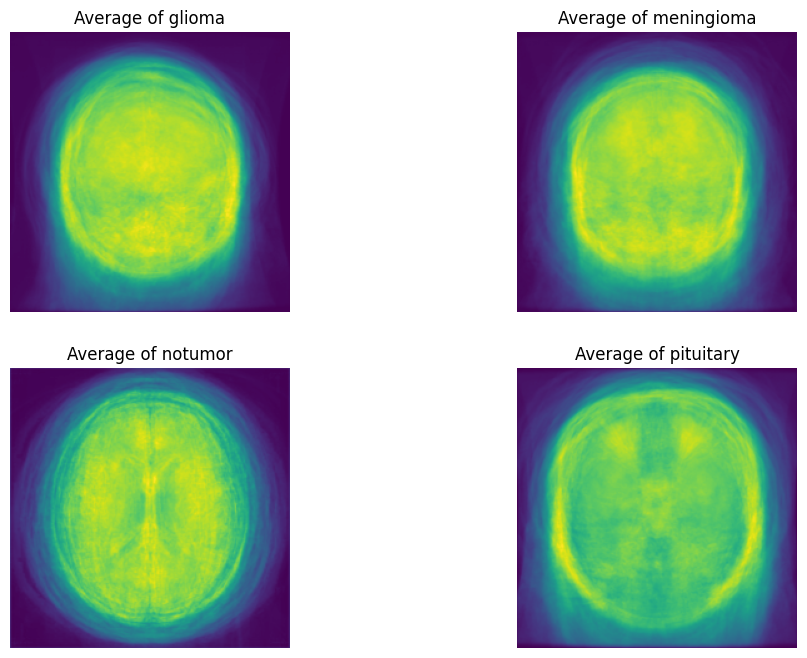

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def average_image(folder):
    imgs = []
    for img_name in os.listdir(folder)[:200]:  # limit to speed up
        img = Image.open(os.path.join(folder, img_name)).convert("L").resize((224,224))
        imgs.append(np.array(img))
    return np.mean(imgs, axis=0)

plt.figure(figsize=(12,8))

for i, cls in enumerate(classes):
    avg_img = average_image(os.path.join(TRAIN_DIR, cls))

    plt.subplot(2,2,i+1)
    plt.imshow(avg_img, cmap="viridis")
    plt.title(f"Average of {cls}")
    plt.axis("off")

plt.show()


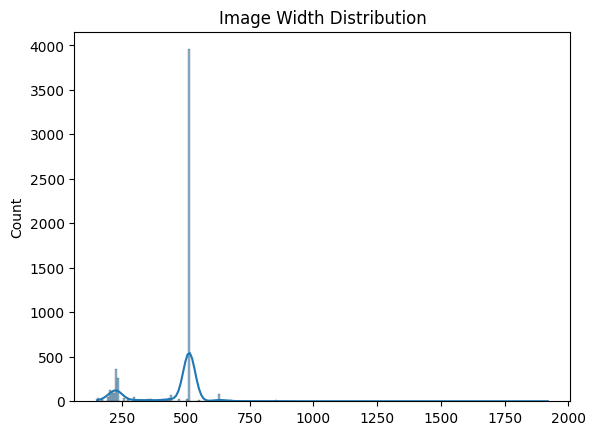

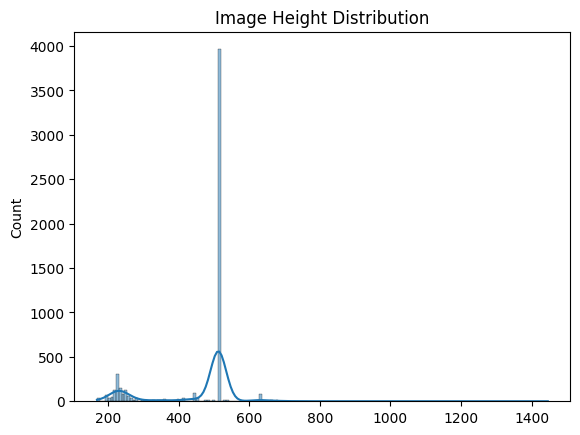

In [47]:
import seaborn as sns

widths = []
heights = []

for cls in classes:
    folder = os.path.join(TRAIN_DIR, cls)
    for img_name in os.listdir(folder):
        img = Image.open(os.path.join(folder, img_name))
        w, h = img.size
        widths.append(w)
        heights.append(h)

sns.histplot(widths, kde=True)
plt.title("Image Width Distribution")
plt.show()

sns.histplot(heights, kde=True)
plt.title("Image Height Distribution")
plt.show()


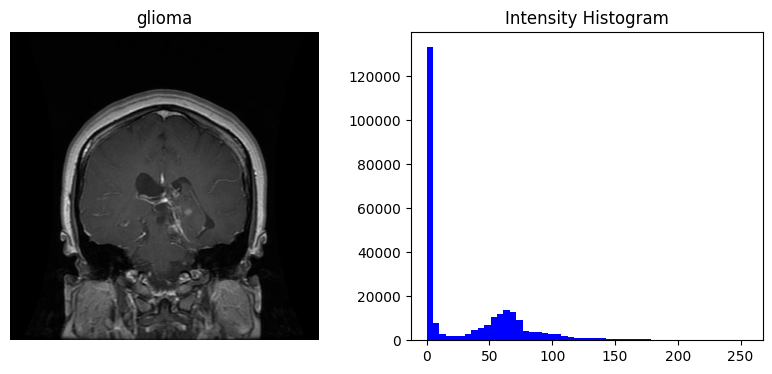

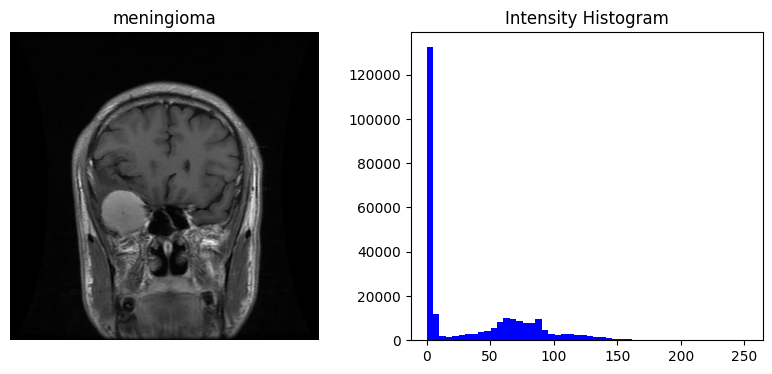

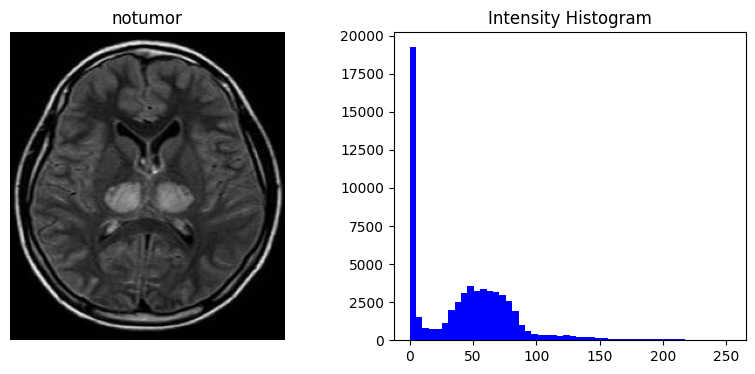

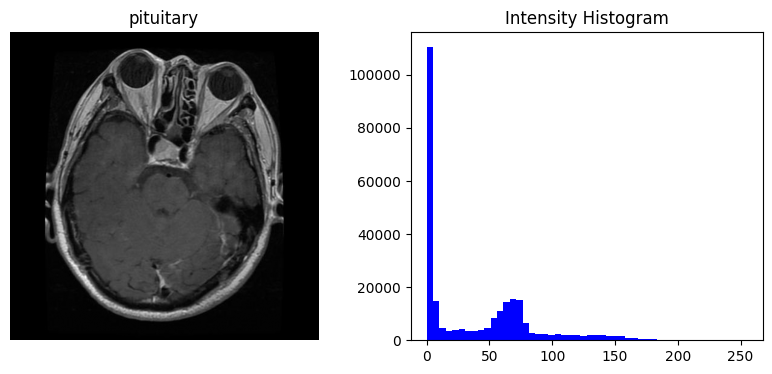

In [48]:
import cv2
import matplotlib.pyplot as plt

def plot_intensity(folder, cls):
    path = os.path.join(folder, cls)
    img_name = random.choice(os.listdir(path))
    img = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title(cls)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.hist(img.ravel(), bins=50, color='blue')
    plt.title("Intensity Histogram")
    plt.show()

for cls in classes:
    plot_intensity(TRAIN_DIR, cls)


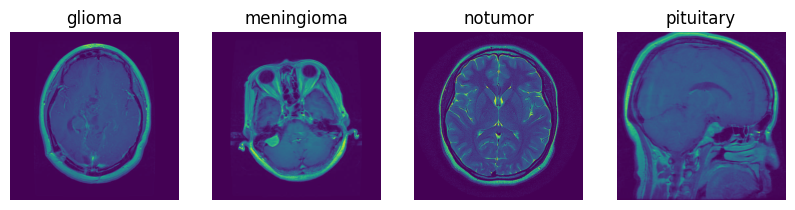

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))

for i, cls in enumerate(classes):
    folder = os.path.join(TRAIN_DIR, cls)
    img_name = random.choice(os.listdir(folder))
    img = Image.open(os.path.join(folder, img_name))

    plt.subplot(1,4,i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.show()


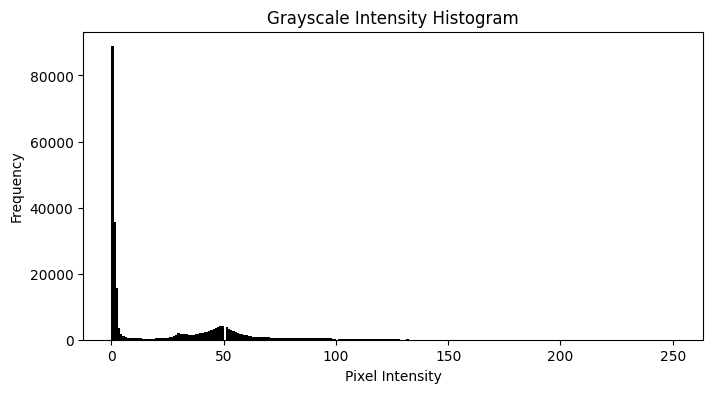

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os, random

img_path = "/content/brain_mri/Training/glioma/" + random.choice(os.listdir("/content/brain_mri/Training/glioma"))
img = Image.open(img_path).convert("L")  # convert to grayscale
img_np = np.array(img)

plt.figure(figsize=(8,4))

plt.hist(img_np.flatten(), bins=256, color='black')
plt.title("Grayscale Intensity Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


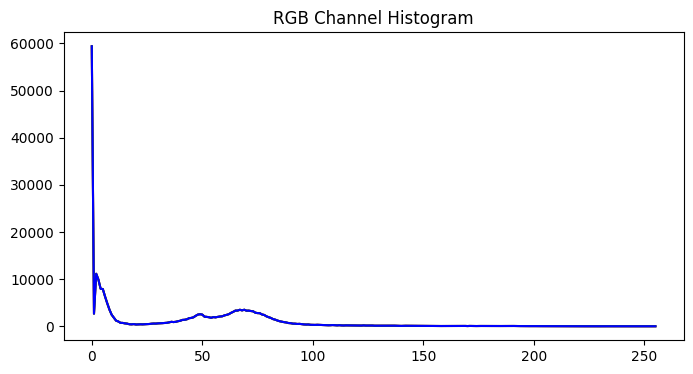

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os, random

folder = "/content/brain_mri/Training/glioma"
img = Image.open(os.path.join(folder, random.choice(os.listdir(folder))))

img_np = np.array(img)

plt.figure(figsize=(8,4))

# If image is RGB (H,W,3)
if len(img_np.shape) == 3:
    colors = ('r','g','b')
    for i, col in enumerate(colors):
        hist = np.histogram(img_np[:,:,i].flatten(), bins=256, range=(0,256))[0]
        plt.plot(hist, color=col)
    plt.title("RGB Channel Histogram")

# If image is grayscale (H,W)
else:
    plt.hist(img_np.flatten(), bins=256, color='black')
    plt.title("Grayscale Histogram")

plt.show()


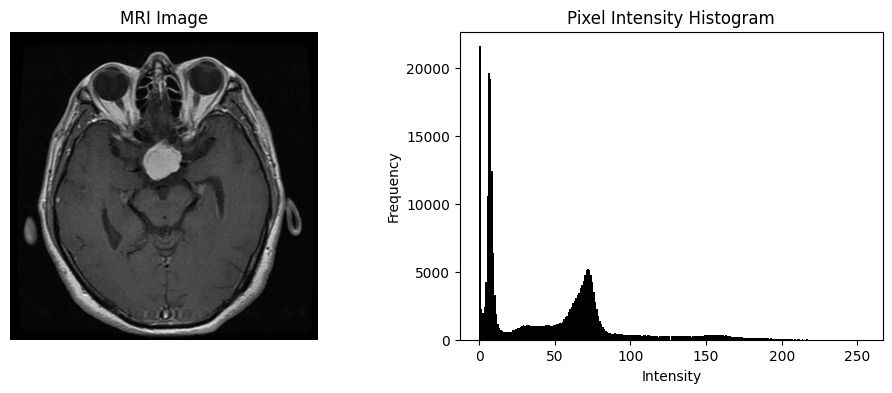

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os, random

folder = "/content/brain_mri/Training/meningioma"
img_path = os.path.join(folder, random.choice(os.listdir(folder)))
img = Image.open(img_path).convert("L")
img_np = np.array(img)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("MRI Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.hist(img_np.flatten(), bins=256, color='black')
plt.title("Pixel Intensity Histogram")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

plt.show()


In [54]:
import os

TRAIN_DIR = "/content/brain_mri/Training"
TEST_DIR  = "/content/brain_mri/Testing"

def count_images(path):
    class_counts = {}
    for cls in sorted(os.listdir(path)):
        cls_path = os.path.join(path, cls)
        if os.path.isdir(cls_path):
            class_counts[cls] = len(os.listdir(cls_path))
    return class_counts

train_counts = count_images(TRAIN_DIR)
test_counts  = count_images(TEST_DIR)

print("📌 Training Set Image Counts:")
for cls, count in train_counts.items():
    print(f"{cls}: {count}")

print("\n📌 Testing Set Image Counts:")
for cls, count in test_counts.items():
    print(f"{cls}: {count}")


📌 Training Set Image Counts:
glioma: 1321
meningioma: 1339
notumor: 1595
pituitary: 1457

📌 Testing Set Image Counts:
glioma: 300
meningioma: 306
notumor: 405
pituitary: 300


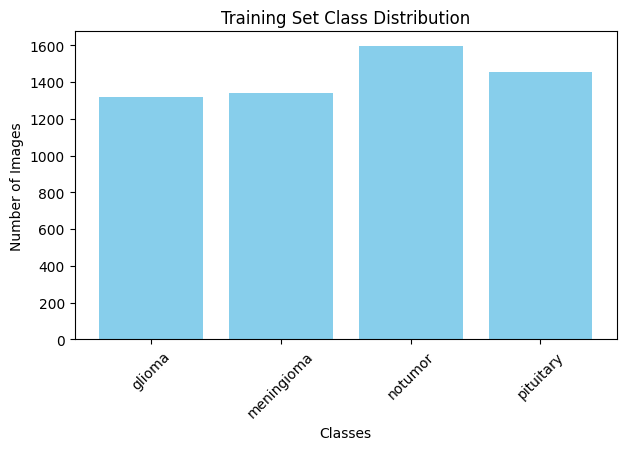

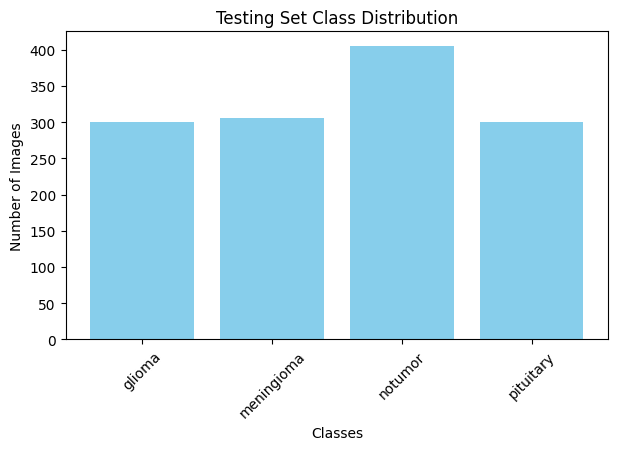

In [55]:
import matplotlib.pyplot as plt

def plot_counts(counts, title):
    classes = list(counts.keys())
    values = list(counts.values())

    plt.figure(figsize=(7,4))
    plt.bar(classes, values, color="skyblue")
    plt.title(title)
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45)
    plt.show()

plot_counts(train_counts, "Training Set Class Distribution")
plot_counts(test_counts,  "Testing Set Class Distribution")


# Models implementation

# CNN from SCRATCH

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models


In [57]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device


device(type='cuda')

In [58]:
class BaselineCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(BaselineCNN, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),   # 112x112

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),   # 56x56

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),   # 28x28

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),   # 14x14

            nn.AdaptiveAvgPool2d((1,1))
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

baseline_model = BaselineCNN(num_classes=4).to(device)
baseline_model


BaselineCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): AdaptiveAvgPool2d(output_size=(1, 1))
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=256, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in

In [59]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(baseline_model.parameters(), lr=0.001)


In [62]:
from tqdm import tqdm

def train_one_epoch(model, loader, optimizer):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for images, labels in tqdm(loader, desc="Training", leave=False):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    return running_loss / len(loader), 100 * correct / total


def validate(model, loader):
    model.eval()
    running_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()

            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    return running_loss / len(loader), 100 * correct / total


In [64]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

IMAGE_SIZE = 224
BATCH_SIZE = 32

train_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(0.1, 0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

TRAIN_DIR = "/content/brain_mri/Training"
TEST_DIR  = "/content/brain_mri/Testing"

full_train_dataset = datasets.ImageFolder(TRAIN_DIR, transform=train_transform)

# 85% train, 15% validation
val_size = int(0.15 * len(full_train_dataset))
train_size = len(full_train_dataset) - val_size

train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size],
                                          generator=torch.Generator().manual_seed(42))

val_dataset.dataset.transform = test_transform

test_dataset = datasets.ImageFolder(TEST_DIR, transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

classes = full_train_dataset.classes

print("Classes:", classes)
print("Train:", len(train_loader.dataset))
print("Val:", len(val_loader.dataset))
print("Test:", len(test_loader.dataset))


Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Train: 4856
Val: 856
Test: 1311


In [65]:
EPOCHS = 10

for epoch in range(1, EPOCHS+1):
    train_loss, train_acc = train_one_epoch(baseline_model, train_loader, optimizer)
    val_loss, val_acc = validate(baseline_model, val_loader)

    print(f"Epoch {epoch}:")
    print(f"  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"  Val Loss:   {val_loss:.4f}, Val Acc:   {val_acc:.2f}%")


Epoch 1:
  Train Loss: 1.1301, Train Acc: 47.43%
  Val Loss:   0.9729, Val Acc:   56.31%


Epoch 2:
  Train Loss: 0.9698, Train Acc: 60.30%
  Val Loss:   0.7797, Val Acc:   70.44%


Epoch 3:
  Train Loss: 0.7605, Train Acc: 70.65%
  Val Loss:   0.6965, Val Acc:   72.43%


Epoch 4:
  Train Loss: 0.6480, Train Acc: 75.14%
  Val Loss:   0.5524, Val Acc:   77.22%


Epoch 5:
  Train Loss: 0.5938, Train Acc: 77.16%
  Val Loss:   0.6220, Val Acc:   76.40%


Epoch 6:
  Train Loss: 0.5466, Train Acc: 79.43%
  Val Loss:   0.4677, Val Acc:   81.54%


Epoch 7:
  Train Loss: 0.5133, Train Acc: 80.56%
  Val Loss:   0.4876, Val Acc:   80.72%


Epoch 8:
  Train Loss: 0.4849, Train Acc: 82.19%
  Val Loss:   0.3860, Val Acc:   85.28%


Epoch 9:
  Train Loss: 0.4533, Train Acc: 83.13%
  Val Loss:   0.5440, Val Acc:   79.32%


Epoch 10:
  Train Loss: 0.4294, Train Acc: 84.08%
  Val Loss:   0.3702, Val Acc:   85.05%


# MODEL 1: ResNet50 (Transfer Learning)

In [66]:
from torchvision import models
import torch.nn as nn

# Load pretrained ResNet50
resnet50 = models.resnet50(weights="IMAGENET1K_V2")

# Freeze feature extractor
for param in resnet50.parameters():
    param.requires_grad = False

# Replace final layer (fc)
num_features = resnet50.fc.in_features
resnet50.fc = nn.Linear(num_features, 4)  # 4 classes

resnet50 = resnet50.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_resnet = torch.optim.Adam(resnet50.fc.parameters(), lr=0.0005)

resnet50


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 111MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [67]:
EPOCHS = 5

for epoch in range(1, EPOCHS+1):
    train_loss, train_acc = train_one_epoch(resnet50, train_loader, optimizer_resnet)
    val_loss, val_acc = validate(resnet50, val_loader)

    print(f"\nResNet50 | Epoch {epoch}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"Val Loss:   {val_loss:.4f},   Val Acc: {val_acc:.2f}%")



ResNet50 | Epoch 1
Train Loss: 0.8908, Train Acc: 74.65%
Val Loss:   0.5643,   Val Acc: 87.27%



ResNet50 | Epoch 2
Train Loss: 0.5397, Train Acc: 86.43%
Val Loss:   0.4326,   Val Acc: 88.55%



ResNet50 | Epoch 3
Train Loss: 0.4367, Train Acc: 87.64%
Val Loss:   0.3589,   Val Acc: 89.72%



ResNet50 | Epoch 4
Train Loss: 0.3843, Train Acc: 89.13%
Val Loss:   0.3379,   Val Acc: 89.72%



ResNet50 | Epoch 5
Train Loss: 0.3489, Train Acc: 89.68%
Val Loss:   0.2923,   Val Acc: 91.00%


# MODEL 3: EfficientNet-B0

In [68]:
effnet = models.efficientnet_b0(weights="IMAGENET1K_V1")

# Freeze base layers
for param in effnet.parameters():
    param.requires_grad = False

# Replace classifier (EfficientNet-B0 uses classifier[1])
num_features = effnet.classifier[1].in_features
effnet.classifier[1] = nn.Linear(num_features, 4)

effnet = effnet.to(device)

optimizer_effnet = torch.optim.Adam(effnet.classifier.parameters(), lr=0.0005)
criterion = nn.CrossEntropyLoss()


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 62.3MB/s]


In [69]:
EPOCHS = 5

for epoch in range(1, EPOCHS+1):
    train_loss, train_acc = train_one_epoch(effnet, train_loader, optimizer_effnet)
    val_loss, val_acc = validate(effnet, val_loader)

    print(f"\nEfficientNet-B0 | Epoch {epoch}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"Val Loss:   {val_loss:.4f},   Val Acc: {val_acc:.2f}%")



EfficientNet-B0 | Epoch 1
Train Loss: 0.7447, Train Acc: 78.34%
Val Loss:   0.4453,   Val Acc: 88.20%



EfficientNet-B0 | Epoch 2
Train Loss: 0.4477, Train Acc: 86.22%
Val Loss:   0.3352,   Val Acc: 90.65%



EfficientNet-B0 | Epoch 3
Train Loss: 0.3835, Train Acc: 87.50%
Val Loss:   0.3104,   Val Acc: 90.89%



EfficientNet-B0 | Epoch 4
Train Loss: 0.3511, Train Acc: 88.26%
Val Loss:   0.2772,   Val Acc: 92.06%



EfficientNet-B0 | Epoch 5
Train Loss: 0.3307, Train Acc: 88.76%
Val Loss:   0.2577,   Val Acc: 93.22%


# MobileNetV2

In [70]:
mobilenet = models.mobilenet_v2(weights="IMAGENET1K_V1")
for param in mobilenet.features.parameters():
    param.requires_grad = False

mobilenet.classifier[1] = nn.Linear(mobilenet.classifier[1].in_features, 4)
mobilenet = mobilenet.to(device)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 87.7MB/s]


# VGG16

In [71]:
vgg16 = models.vgg16(weights="IMAGENET1K_V1")
for param in vgg16.features.parameters():
    param.requires_grad = False

vgg16.classifier[6] = nn.Linear(4096, 4)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:07<00:00, 73.0MB/s]


In [72]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [73]:
def evaluate_model(model, loader):
    model.eval()
    preds = []
    trues = []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            _, predicted = outputs.max(1)
            preds.extend(predicted.cpu().numpy())
            trues.extend(labels.cpu().numpy())

    acc = accuracy_score(trues, preds)
    return acc, trues, preds


In [74]:
def plot_conf_matrix(trues, preds, classes, model_name):
    cm = confusion_matrix(trues, preds)

    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=classes, yticklabels=classes)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [76]:
def show_classification_report(trues, preds, classes, model_name):
    print(f"\nClassification Report - {model_name}")
    print(classification_report(trues, preds, target_names=classes))


In [78]:
from torchvision import models
import torch.nn as nn

# Load pretrained DenseNet121
densenet = models.densenet121(weights="IMAGENET1K_V1")

# Freeze feature extractor
for param in densenet.parameters():
    param.requires_grad = False

# Replace classifier for 4 classes
num_features = densenet.classifier.in_features
densenet.classifier = nn.Linear(num_features, 4)

densenet = densenet.to(device)

# Optimizer
optimizer_dense = torch.optim.Adam(densenet.classifier.parameters(), lr=0.0005)

print("DenseNet121 is ready!")


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


100%|██████████| 30.8M/30.8M [00:00<00:00, 101MB/s]


DenseNet121 is ready!


In [79]:
EPOCHS = 5

for epoch in range(1, EPOCHS+1):
    train_loss, train_acc = train_one_epoch(densenet, train_loader, optimizer_dense)
    val_loss, val_acc = validate(densenet, val_loader)

    print(f"\nDenseNet121 | Epoch {epoch}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"Val Loss:   {val_loss:.4f},   Val Acc: {val_acc:.2f}%")



DenseNet121 | Epoch 1
Train Loss: 0.8447, Train Acc: 71.50%
Val Loss:   0.5091,   Val Acc: 86.10%



DenseNet121 | Epoch 2
Train Loss: 0.4854, Train Acc: 85.44%
Val Loss:   0.3830,   Val Acc: 88.79%



DenseNet121 | Epoch 3
Train Loss: 0.4006, Train Acc: 87.21%
Val Loss:   0.3208,   Val Acc: 89.95%



DenseNet121 | Epoch 4
Train Loss: 0.3607, Train Acc: 88.12%
Val Loss:   0.2890,   Val Acc: 90.07%



DenseNet121 | Epoch 5
Train Loss: 0.3398, Train Acc: 88.74%
Val Loss:   0.2709,   Val Acc: 90.42%


In [81]:
# Ensure device is set
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Move all models to GPU/CPU
baseline_model = baseline_model.to(device)
resnet50       = resnet50.to(device)
densenet       = densenet.to(device)
effnet         = effnet.to(device)
mobilenet      = mobilenet.to(device)
vgg16          = vgg16.to(device)

print("All models moved to device successfully!")


Using device: cuda
All models moved to device successfully!


In [83]:
def evaluate_model(model, loader):
    model.eval()
    preds = []
    trues = []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)  # <-- match device
            outputs = model(images)

            _, predicted = outputs.max(1)
            preds.extend(predicted.cpu().numpy())
            trues.extend(labels.cpu().numpy())

    acc = accuracy_score(trues, preds)
    return acc, trues, preds



----- Evaluating Baseline CNN -----
Test Accuracy: 79.94%

Classification Report - Baseline CNN
              precision    recall  f1-score   support

      glioma       0.86      0.76      0.81       300
  meningioma       0.69      0.44      0.54       306
     notumor       0.78      0.97      0.87       405
   pituitary       0.84      0.96      0.90       300

    accuracy                           0.80      1311
   macro avg       0.79      0.79      0.78      1311
weighted avg       0.79      0.80      0.78      1311



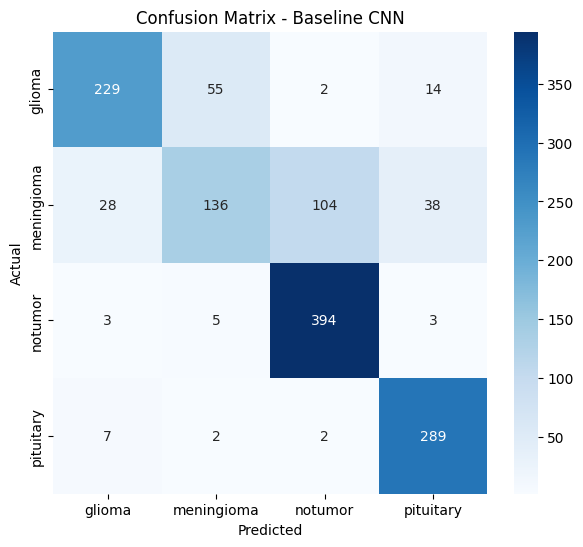


----- Evaluating ResNet50 -----
Test Accuracy: 86.12%

Classification Report - ResNet50
              precision    recall  f1-score   support

      glioma       0.92      0.78      0.84       300
  meningioma       0.73      0.71      0.72       306
     notumor       0.87      0.98      0.92       405
   pituitary       0.92      0.94      0.93       300

    accuracy                           0.86      1311
   macro avg       0.86      0.85      0.85      1311
weighted avg       0.86      0.86      0.86      1311



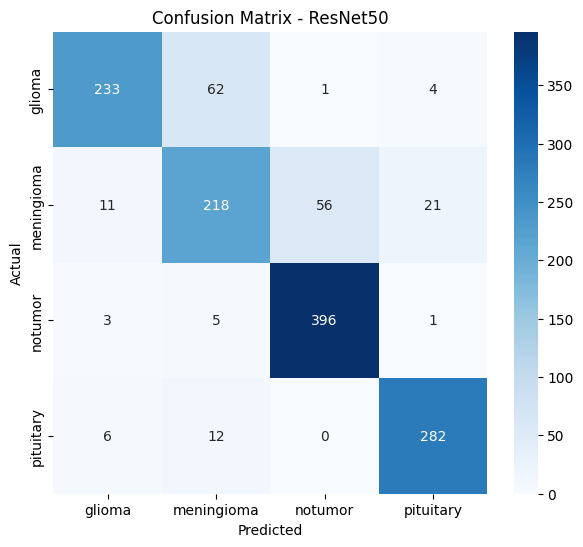


----- Evaluating DenseNet121 -----
Test Accuracy: 85.89%

Classification Report - DenseNet121
              precision    recall  f1-score   support

      glioma       0.94      0.83      0.88       300
  meningioma       0.76      0.64      0.70       306
     notumor       0.85      0.97      0.91       405
   pituitary       0.88      0.96      0.92       300

    accuracy                           0.86      1311
   macro avg       0.86      0.85      0.85      1311
weighted avg       0.86      0.86      0.85      1311



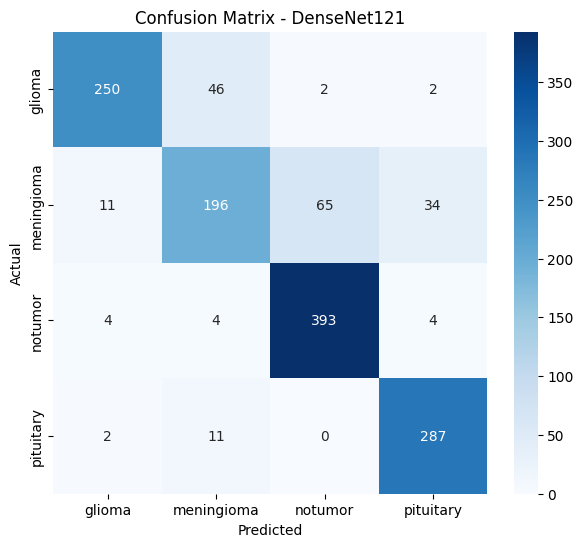


----- Evaluating EfficientNetB0 -----
Test Accuracy: 86.88%

Classification Report - EfficientNetB0
              precision    recall  f1-score   support

      glioma       0.97      0.76      0.85       300
  meningioma       0.74      0.75      0.74       306
     notumor       0.87      0.98      0.92       405
   pituitary       0.92      0.96      0.94       300

    accuracy                           0.87      1311
   macro avg       0.87      0.86      0.86      1311
weighted avg       0.87      0.87      0.87      1311



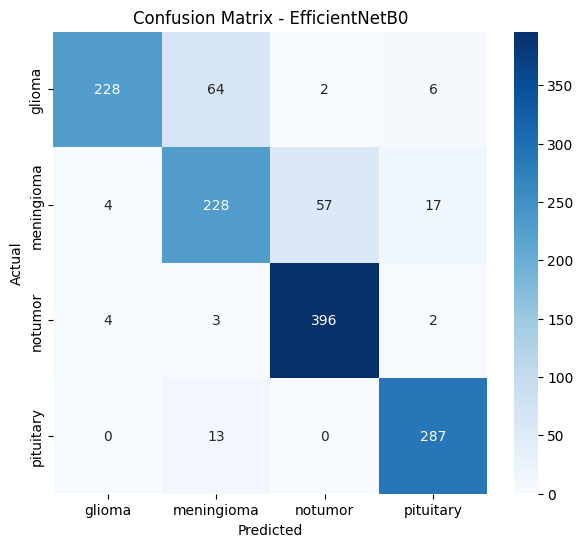


----- Evaluating MobileNetV2 -----
Test Accuracy: 30.51%

Classification Report - MobileNetV2
              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00       300
  meningioma       0.20      0.00      0.01       306
     notumor       0.32      0.99      0.48       405
   pituitary       0.00      0.00      0.00       300

    accuracy                           0.31      1311
   macro avg       0.13      0.25      0.12      1311
weighted avg       0.14      0.31      0.15      1311



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


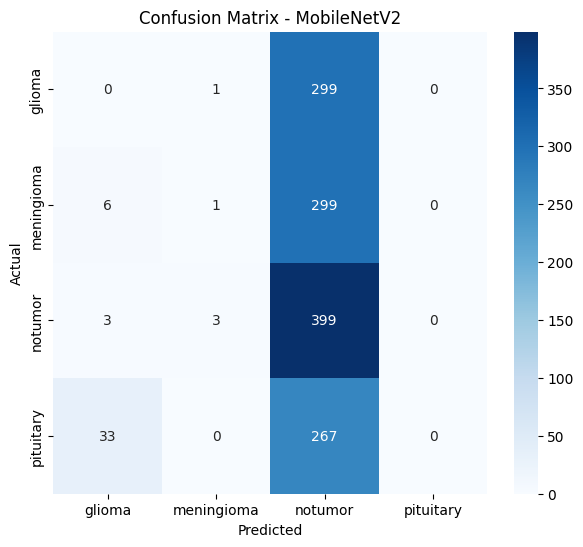


----- Evaluating VGG16 -----
Test Accuracy: 22.96%

Classification Report - VGG16
              precision    recall  f1-score   support

      glioma       0.29      0.26      0.27       300
  meningioma       0.18      0.37      0.24       306
     notumor       0.27      0.13      0.18       405
   pituitary       0.26      0.19      0.22       300

    accuracy                           0.23      1311
   macro avg       0.25      0.24      0.23      1311
weighted avg       0.25      0.23      0.22      1311



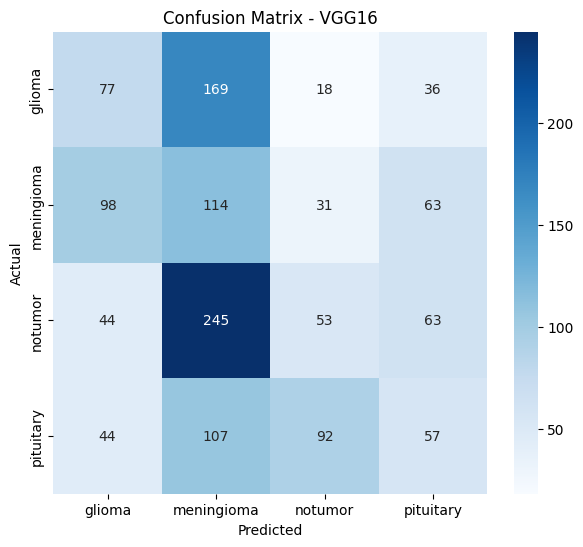

In [84]:
models = {
    "Baseline CNN": baseline_model,
    "ResNet50": resnet50,
    "DenseNet121": densenet,
    "EfficientNetB0": effnet,
    "MobileNetV2": mobilenet,
    "VGG16": vgg16
}

results = {}
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

for name, model in models.items():
    print(f"\n----- Evaluating {name} -----")

    acc, trues, preds = evaluate_model(model, test_loader)
    results[name] = acc * 100

    print(f"Test Accuracy: {acc*100:.2f}%")

    show_classification_report(trues, preds, classes, name)
    plot_conf_matrix(trues, preds, classes, name)


In [85]:
def show_classification_report(trues, preds, classes, model_name):
    print(f"\n===== Classification Report: {model_name} =====")
    print(classification_report(trues, preds, target_names=classes))


In [87]:
def top_k_accuracy(model, loader, k=3):
    model.eval()
    correct, total = 0, 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, topk = outputs.topk(k, dim=1)

            correct += (topk == labels.view(-1,1)).sum().item()
            total += labels.size(0)

    return correct / total



 Evaluating Baseline CNN

✔ Test Accuracy: 79.94%

===== Classification Report: Baseline CNN =====
              precision    recall  f1-score   support

      glioma       0.86      0.76      0.81       300
  meningioma       0.69      0.44      0.54       306
     notumor       0.78      0.97      0.87       405
   pituitary       0.84      0.96      0.90       300

    accuracy                           0.80      1311
   macro avg       0.79      0.79      0.78      1311
weighted avg       0.79      0.80      0.78      1311



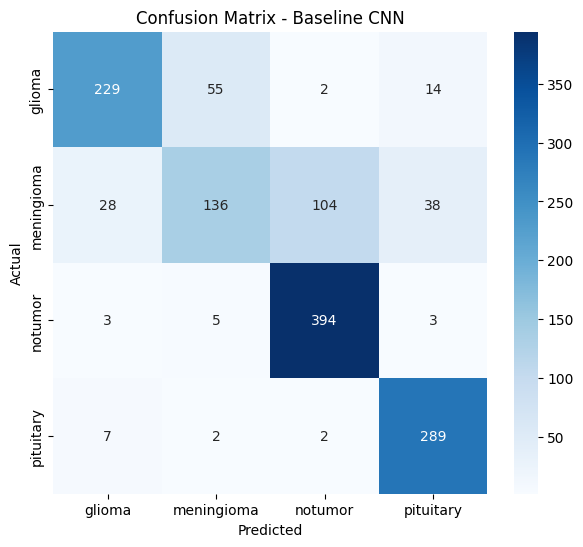

✔ Top-3 Accuracy: 99.77%

 Evaluating ResNet50

✔ Test Accuracy: 86.12%

===== Classification Report: ResNet50 =====
              precision    recall  f1-score   support

      glioma       0.92      0.78      0.84       300
  meningioma       0.73      0.71      0.72       306
     notumor       0.87      0.98      0.92       405
   pituitary       0.92      0.94      0.93       300

    accuracy                           0.86      1311
   macro avg       0.86      0.85      0.85      1311
weighted avg       0.86      0.86      0.86      1311



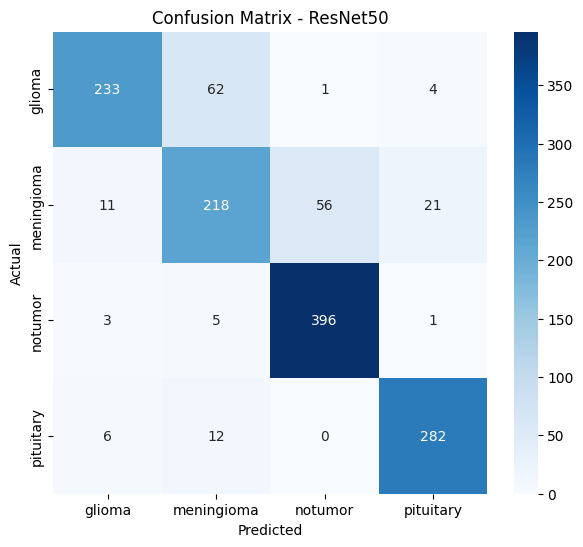

✔ Top-3 Accuracy: 99.54%

 Evaluating DenseNet121

✔ Test Accuracy: 85.89%

===== Classification Report: DenseNet121 =====
              precision    recall  f1-score   support

      glioma       0.94      0.83      0.88       300
  meningioma       0.76      0.64      0.70       306
     notumor       0.85      0.97      0.91       405
   pituitary       0.88      0.96      0.92       300

    accuracy                           0.86      1311
   macro avg       0.86      0.85      0.85      1311
weighted avg       0.86      0.86      0.85      1311



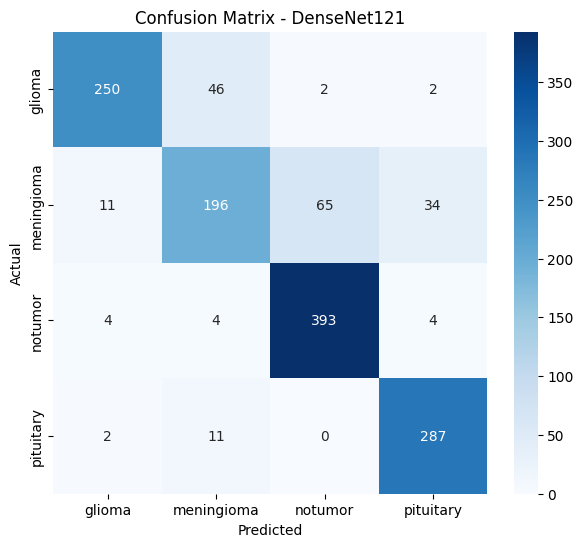

✔ Top-3 Accuracy: 99.69%

 Evaluating EfficientNetB0

✔ Test Accuracy: 86.88%

===== Classification Report: EfficientNetB0 =====
              precision    recall  f1-score   support

      glioma       0.97      0.76      0.85       300
  meningioma       0.74      0.75      0.74       306
     notumor       0.87      0.98      0.92       405
   pituitary       0.92      0.96      0.94       300

    accuracy                           0.87      1311
   macro avg       0.87      0.86      0.86      1311
weighted avg       0.87      0.87      0.87      1311



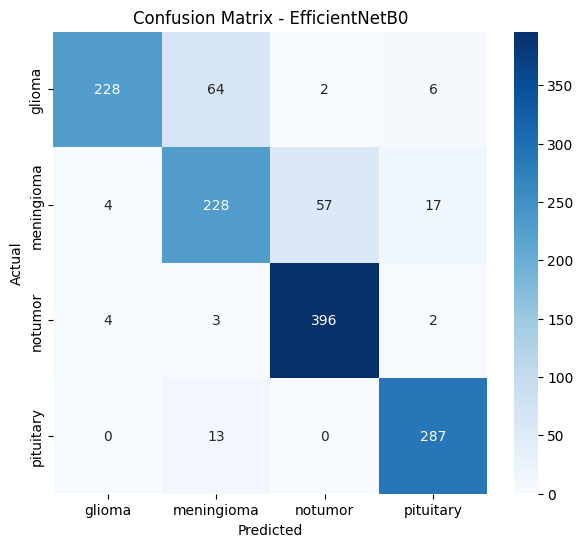

✔ Top-3 Accuracy: 99.77%

 Evaluating MobileNetV2

✔ Test Accuracy: 30.51%

===== Classification Report: MobileNetV2 =====
              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00       300
  meningioma       0.20      0.00      0.01       306
     notumor       0.32      0.99      0.48       405
   pituitary       0.00      0.00      0.00       300

    accuracy                           0.31      1311
   macro avg       0.13      0.25      0.12      1311
weighted avg       0.14      0.31      0.15      1311



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


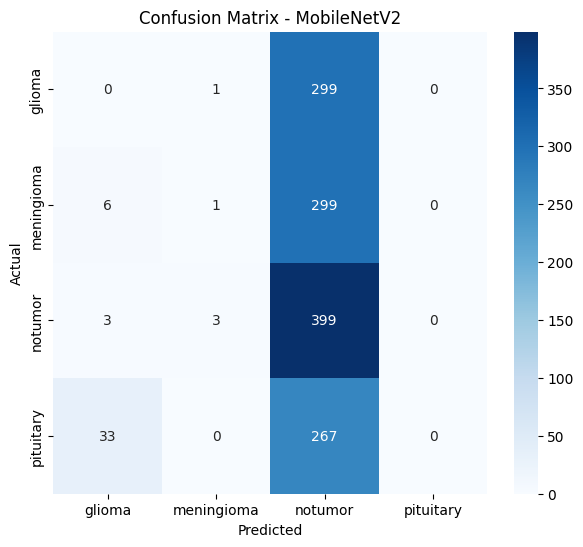

✔ Top-3 Accuracy: 77.57%

 Evaluating VGG16

✔ Test Accuracy: 22.96%

===== Classification Report: VGG16 =====
              precision    recall  f1-score   support

      glioma       0.29      0.26      0.27       300
  meningioma       0.18      0.37      0.24       306
     notumor       0.27      0.13      0.18       405
   pituitary       0.26      0.19      0.22       300

    accuracy                           0.23      1311
   macro avg       0.25      0.24      0.23      1311
weighted avg       0.25      0.23      0.22      1311



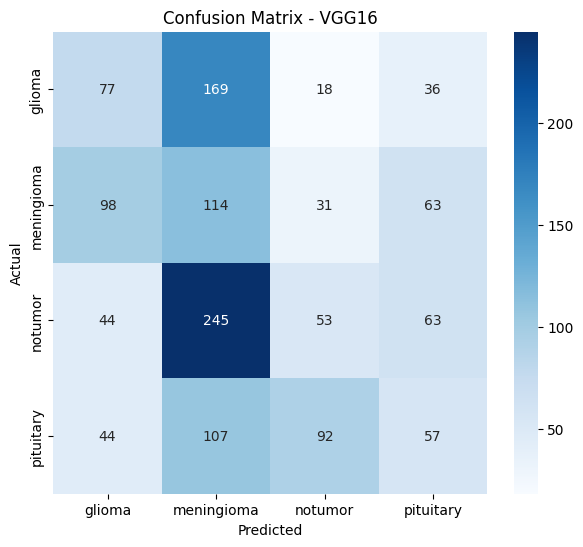

✔ Top-3 Accuracy: 77.35%


In [88]:
models = {
    "Baseline CNN": baseline_model,
    "ResNet50": resnet50,
    "DenseNet121": densenet,
    "EfficientNetB0": effnet,
    "MobileNetV2": mobilenet,
    "VGG16": vgg16
}

results = {}

classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

for name, model in models.items():
    print(f"\n====================")
    print(f" Evaluating {name}")
    print(f"====================")

    acc, trues, preds = evaluate_model(model, test_loader)
    results[name] = acc * 100

    print(f"\n✔ Test Accuracy: {acc*100:.2f}%")

    show_classification_report(trues, preds, classes, name)
    plot_conf_matrix(trues, preds, classes, name)

    top3 = top_k_accuracy(model, test_loader, k=3)
    print(f"✔ Top-3 Accuracy: {top3*100:.2f}%")


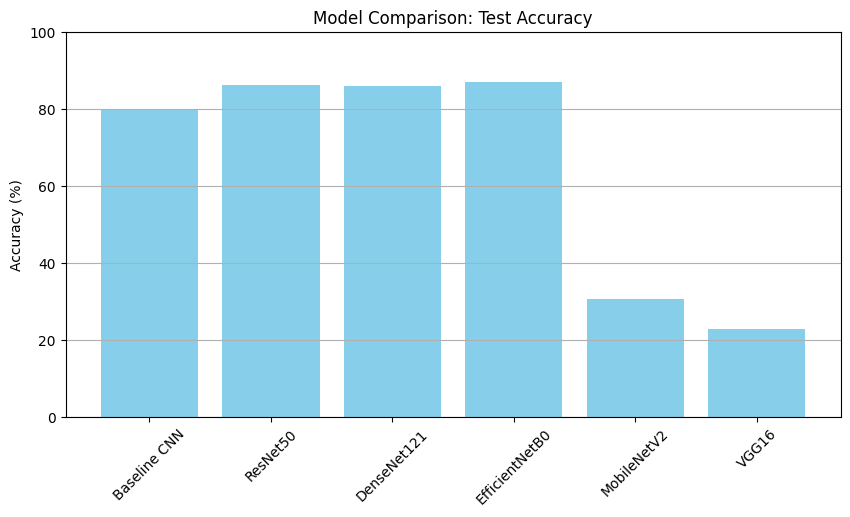

In [89]:
plt.figure(figsize=(10,5))
names = list(results.keys())
acc_values = list(results.values())

plt.bar(names, acc_values, color='skyblue')
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison: Test Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


In [90]:
print("\n====== Final Model Performance Summary ======\n")
for name, acc in results.items():
    print(f"{name:20s} : {acc:.2f}%")



====== Final Model Performance Summary ======

Baseline CNN         : 79.94%
ResNet50             : 86.12%
DenseNet121          : 85.89%
EfficientNetB0       : 86.88%
MobileNetV2          : 30.51%
VGG16                : 22.96%


In [91]:
from sklearn.metrics import precision_recall_fscore_support

metrics = {}

for name, model in models.items():
    acc, trues, preds = evaluate_model(model, test_loader)

    precision, recall, f1, _ = precision_recall_fscore_support(
        trues, preds, average='macro'
    )

    metrics[name] = {
        "accuracy": acc * 100,
        "precision": precision * 100,
        "recall": recall * 100,
        "f1": f1 * 100
    }

metrics


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'Baseline CNN': {'accuracy': 79.93897787948131,
  'precision': 79.23808565822755,
  'recall': 78.59876543209877,
  'f1': 77.84391111672481},
 'ResNet50': {'accuracy': 86.11746758199847,
  'precision': 86.1177987905601,
  'recall': 85.17156862745098,
  'f1': 85.41090556684019},
 'DenseNet121': {'accuracy': 85.88863463005339,
  'precision': 85.77497923693545,
  'recall': 85.0223311546841,
  'f1': 85.0561303013659},
 'EfficientNetB0': {'accuracy': 86.88024408848207,
  'precision': 87.41407250941148,
  'recall': 85.98856209150327,
  'f1': 86.30640019297174},
 'MobileNetV2': {'accuracy': 30.511060259344013,
  'precision': 12.891613924050633,
  'recall': 24.711328976034856,
  'f1': 12.114037132580304},
 'VGG16': {'accuracy': 22.95957284515637,
  'precision': 25.144326833643927,
  'recall': 23.751997095134346,
  'f1': 22.811121203357175}}

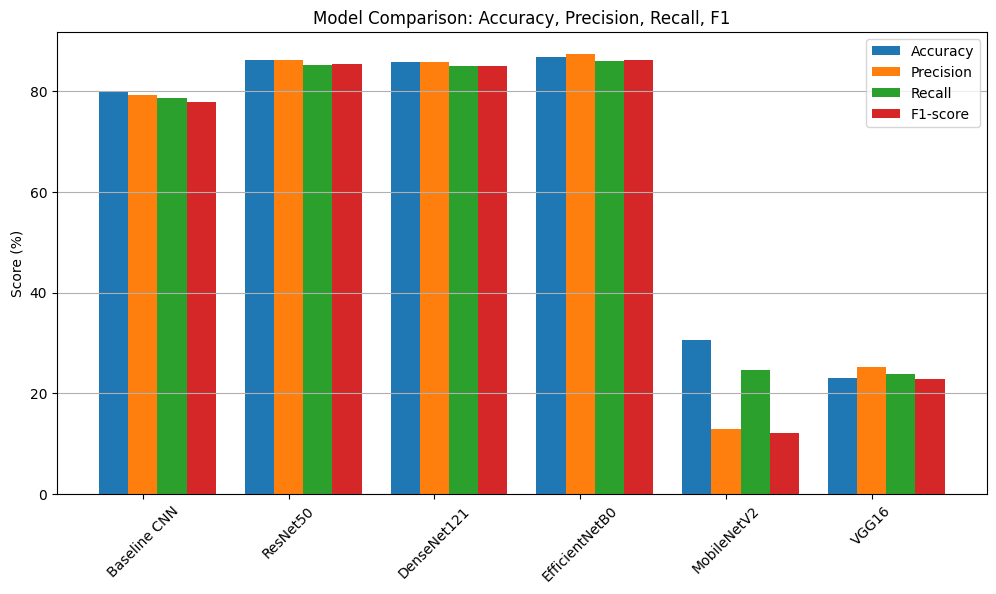

In [92]:
import numpy as np
import matplotlib.pyplot as plt

models_list = list(metrics.keys())
accuracy = [metrics[m]["accuracy"] for m in models_list]
precision = [metrics[m]["precision"] for m in models_list]
recall = [metrics[m]["recall"] for m in models_list]
f1 = [metrics[m]["f1"] for m in models_list]

x = np.arange(len(models_list))
w = 0.2

plt.figure(figsize=(12,6))
plt.bar(x - w, accuracy, width=w, label='Accuracy')
plt.bar(x, precision, width=w, label='Precision')
plt.bar(x + w, recall, width=w, label='Recall')
plt.bar(x + 2*w, f1, width=w, label='F1-score')

plt.xticks(x, models_list, rotation=45)
plt.ylabel("Score (%)")
plt.title("Model Comparison: Accuracy, Precision, Recall, F1")
plt.legend()
plt.grid(axis="y")
plt.show()


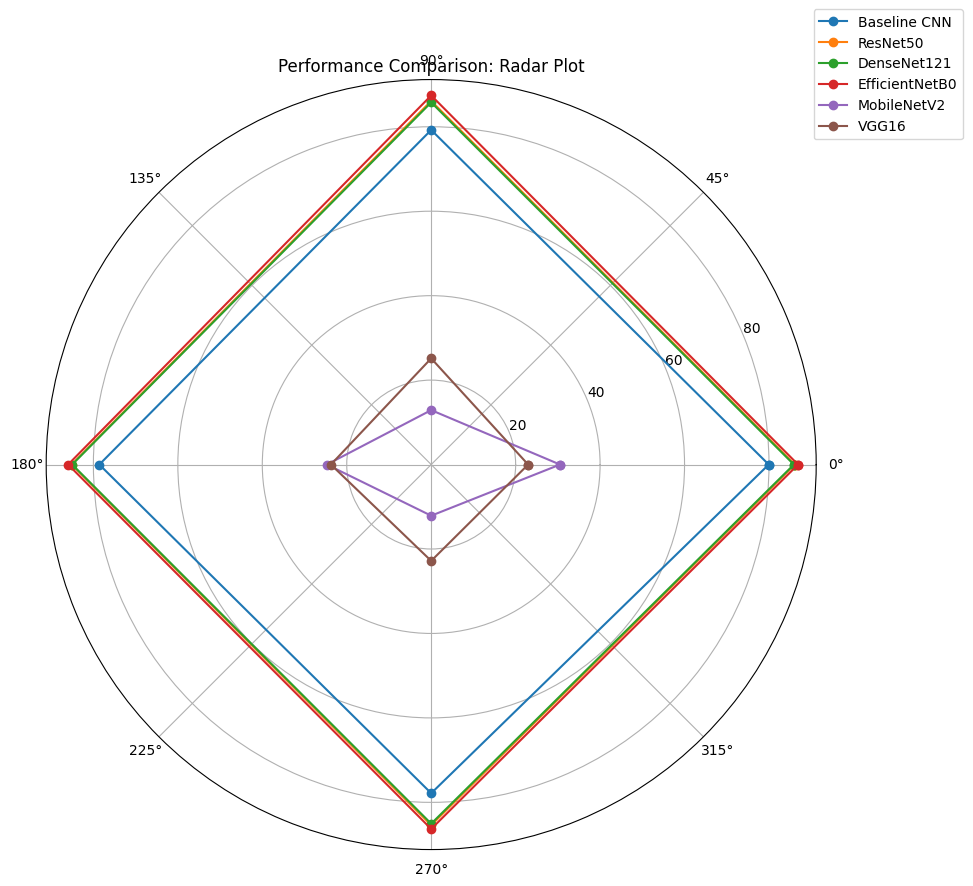

In [93]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
num_vars = len(labels)

plt.figure(figsize=(10,10))

for model_name in metrics.keys():
    values = [
        metrics[model_name]["accuracy"],
        metrics[model_name]["precision"],
        metrics[model_name]["recall"],
        metrics[model_name]["f1"]
    ]
    angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]

    plt.polar(angles, values, marker='o', label=model_name)

plt.title("Performance Comparison: Radar Plot")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()


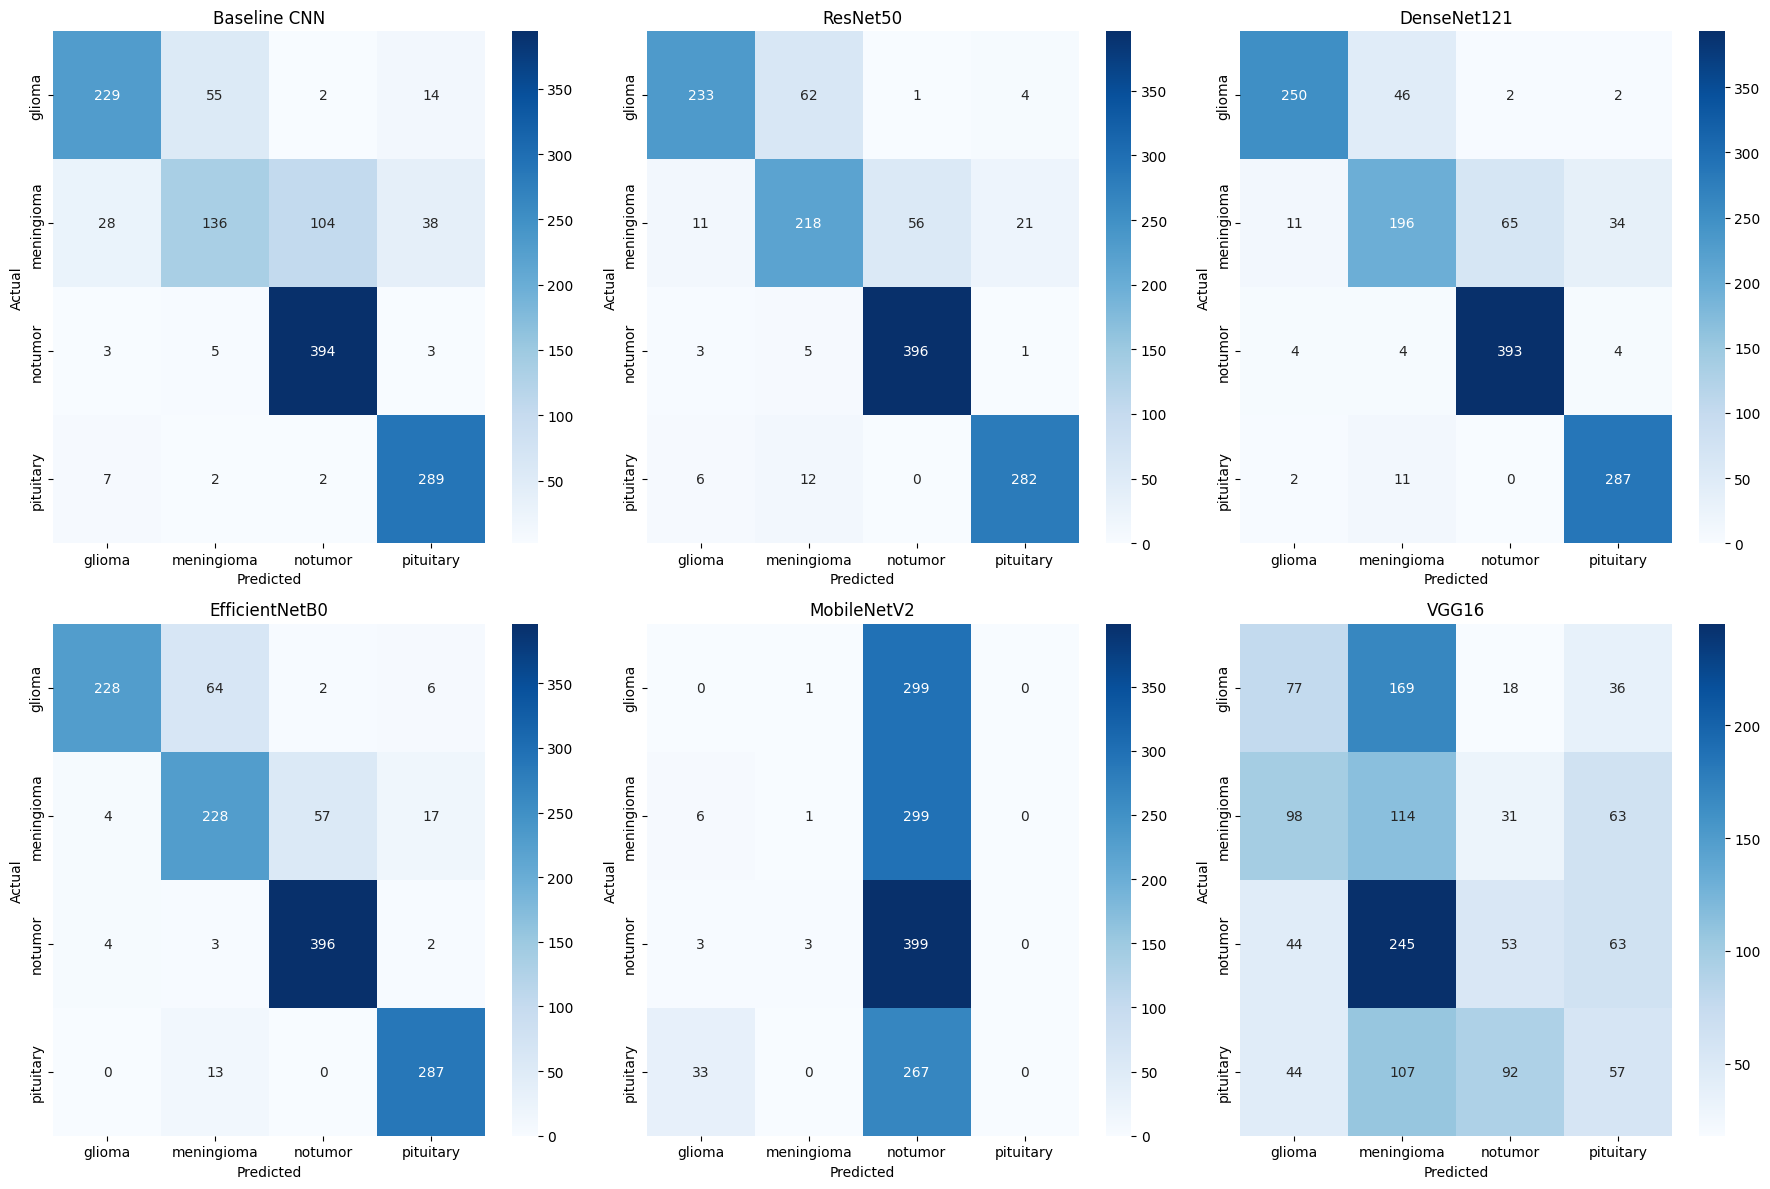

In [94]:
fig, axes = plt.subplots(2, 3, figsize=(18,12))

axes = axes.flatten()

i = 0
for name, model in models.items():
    acc, trues, preds = evaluate_model(model, test_loader)
    cm = confusion_matrix(trues, preds)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=classes, yticklabels=classes, ax=axes[i])

    axes[i].set_title(name)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
    i += 1

plt.tight_layout()
plt.show()


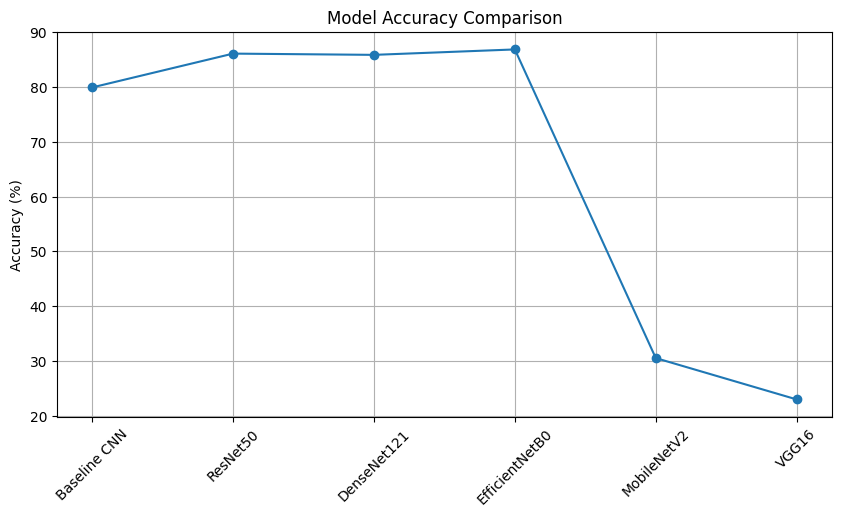

In [95]:
plt.figure(figsize=(10,5))
plt.plot(models_list, accuracy, marker='o')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [96]:
def train_model(model, optimizer, train_loader, val_loader, epochs=10):
    history = {
        "train_loss": [],
        "val_loss": [],
        "train_acc": [],
        "val_acc": []
    }

    for epoch in range(1, epochs + 1):
        # ----- TRAIN -----
        model.train()
        running_loss = 0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total

        # ----- VALIDATION -----
        model.eval()
        running_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                running_loss += loss.item()

                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        val_loss = running_loss / len(val_loader)
        val_acc = 100 * correct / total

        # SAVE HISTORY
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["train_acc"].append(train_acc)
        history["val_acc"].append(val_acc)

        print(f"Epoch [{epoch}/{epochs}]  Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
        print(f"                   Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}%")

    return history


In [97]:
def plot_training_curves(history, model_name):
    epochs = len(history["train_loss"])

    plt.figure(figsize=(14,5))

    # ----- LOSS -----
    plt.subplot(1,2,1)
    plt.plot(history["train_loss"], label="Train Loss")
    plt.plot(history["val_loss"], label="Val Loss")
    plt.title(f"{model_name} - Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()

    # ----- ACCURACY -----
    plt.subplot(1,2,2)
    plt.plot(history["train_acc"], label="Train Acc")
    plt.plot(history["val_acc"], label="Val Acc")
    plt.title(f"{model_name} - Accuracy Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid()

    plt.show()


Epoch [1/10]  Train Loss: 0.4086 | Val Loss: 0.4331
                   Train Acc: 84.43% | Val Acc: 83.76%
Epoch [2/10]  Train Loss: 0.3874 | Val Loss: 0.3290
                   Train Acc: 84.97% | Val Acc: 86.68%
Epoch [3/10]  Train Loss: 0.3539 | Val Loss: 0.3234
                   Train Acc: 86.90% | Val Acc: 87.50%
Epoch [4/10]  Train Loss: 0.3551 | Val Loss: 0.3777
                   Train Acc: 87.31% | Val Acc: 86.80%
Epoch [5/10]  Train Loss: 0.3249 | Val Loss: 0.3056
                   Train Acc: 88.08% | Val Acc: 88.55%
Epoch [6/10]  Train Loss: 0.2995 | Val Loss: 0.3046
                   Train Acc: 88.41% | Val Acc: 89.02%
Epoch [7/10]  Train Loss: 0.2960 | Val Loss: 0.2822
                   Train Acc: 89.21% | Val Acc: 88.20%
Epoch [8/10]  Train Loss: 0.2947 | Val Loss: 0.2603
                   Train Acc: 89.04% | Val Acc: 89.95%
Epoch [9/10]  Train Loss: 0.2610 | Val Loss: 0.2362
                   Train Acc: 90.34% | Val Acc: 90.77%
Epoch [10/10]  Train Loss: 0.2459 | V

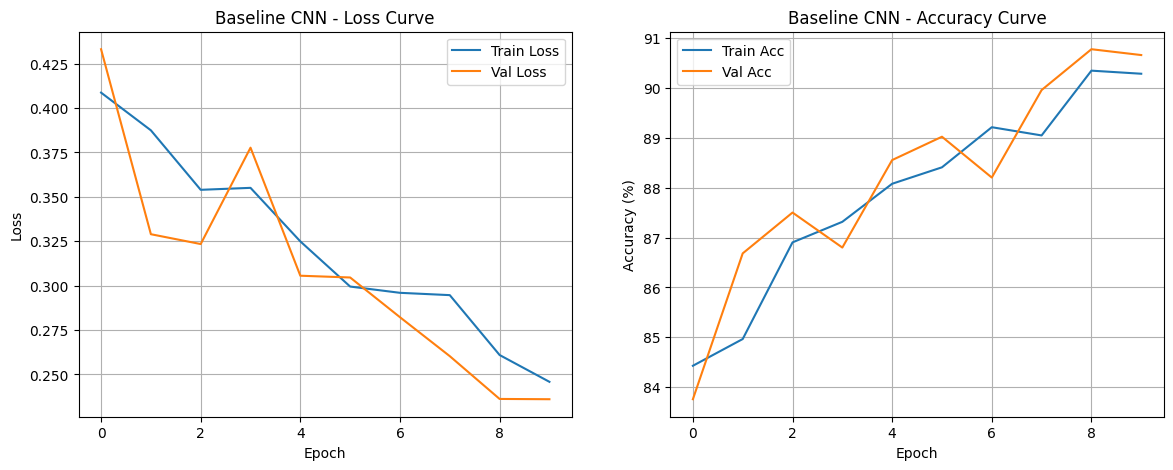

In [98]:
baseline_history = train_model(baseline_model, optimizer, train_loader, val_loader, epochs=10)
plot_training_curves(baseline_history, "Baseline CNN")


Epoch [1/10]  Train Loss: 0.3176 | Val Loss: 0.2914
                   Train Acc: 90.77% | Val Acc: 90.77%
Epoch [2/10]  Train Loss: 0.3034 | Val Loss: 0.2696
                   Train Acc: 90.77% | Val Acc: 91.47%
Epoch [3/10]  Train Loss: 0.2801 | Val Loss: 0.3009
                   Train Acc: 91.74% | Val Acc: 91.47%
Epoch [4/10]  Train Loss: 0.2661 | Val Loss: 0.2402
                   Train Acc: 92.20% | Val Acc: 91.71%
Epoch [5/10]  Train Loss: 0.2493 | Val Loss: 0.2516
                   Train Acc: 92.30% | Val Acc: 92.64%
Epoch [6/10]  Train Loss: 0.2368 | Val Loss: 0.2739
                   Train Acc: 92.87% | Val Acc: 91.12%
Epoch [7/10]  Train Loss: 0.2337 | Val Loss: 0.2200
                   Train Acc: 92.87% | Val Acc: 93.22%
Epoch [8/10]  Train Loss: 0.2272 | Val Loss: 0.2141
                   Train Acc: 93.49% | Val Acc: 92.76%
Epoch [9/10]  Train Loss: 0.2089 | Val Loss: 0.2050
                   Train Acc: 93.86% | Val Acc: 93.69%
Epoch [10/10]  Train Loss: 0.2062 | V

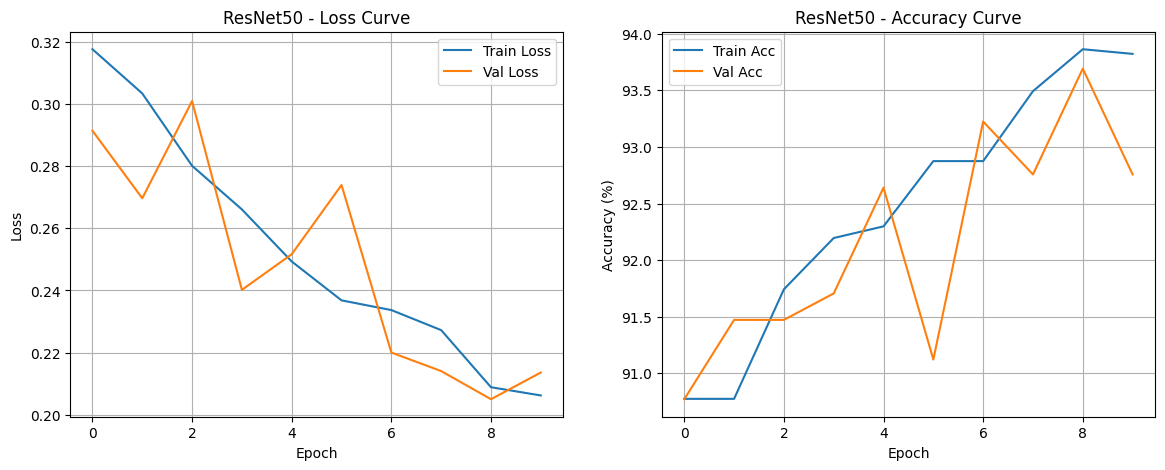

In [99]:
resnet_history = train_model(resnet50, optimizer_resnet, train_loader, val_loader, epochs=10)
plot_training_curves(resnet_history, "ResNet50")


Epoch [1/10]  Train Loss: 0.3081 | Val Loss: 0.2577
                   Train Acc: 89.72% | Val Acc: 90.89%
Epoch [2/10]  Train Loss: 0.2882 | Val Loss: 0.2456
                   Train Acc: 90.63% | Val Acc: 90.89%
Epoch [3/10]  Train Loss: 0.2812 | Val Loss: 0.2454
                   Train Acc: 90.44% | Val Acc: 90.65%
Epoch [4/10]  Train Loss: 0.2650 | Val Loss: 0.2284
                   Train Acc: 91.31% | Val Acc: 91.59%
Epoch [5/10]  Train Loss: 0.2643 | Val Loss: 0.2239
                   Train Acc: 90.86% | Val Acc: 91.94%
Epoch [6/10]  Train Loss: 0.2541 | Val Loss: 0.2166
                   Train Acc: 91.45% | Val Acc: 91.47%
Epoch [7/10]  Train Loss: 0.2500 | Val Loss: 0.2096
                   Train Acc: 91.52% | Val Acc: 92.29%
Epoch [8/10]  Train Loss: 0.2354 | Val Loss: 0.2064
                   Train Acc: 92.07% | Val Acc: 91.94%
Epoch [9/10]  Train Loss: 0.2374 | Val Loss: 0.2031
                   Train Acc: 91.64% | Val Acc: 92.29%
Epoch [10/10]  Train Loss: 0.2362 | V

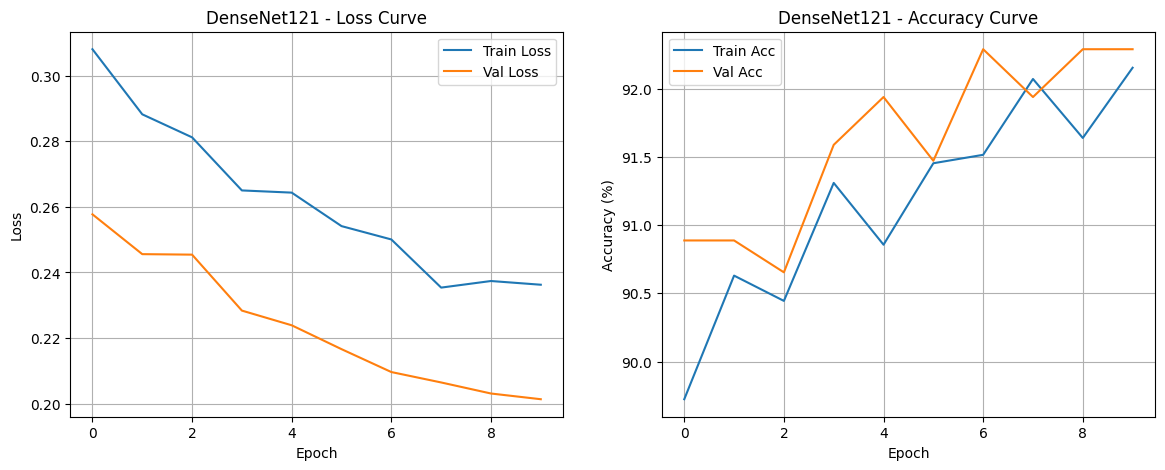

In [100]:
densenet_history = train_model(densenet, optimizer_dense, train_loader, val_loader, epochs=10)
plot_training_curves(densenet_history, "DenseNet121")


Epoch [1/10]  Train Loss: 0.3085 | Val Loss: 0.2482
                   Train Acc: 90.07% | Val Acc: 92.64%
Epoch [2/10]  Train Loss: 0.2909 | Val Loss: 0.2421
                   Train Acc: 90.05% | Val Acc: 92.06%
Epoch [3/10]  Train Loss: 0.2841 | Val Loss: 0.2281
                   Train Acc: 90.61% | Val Acc: 92.87%
Epoch [4/10]  Train Loss: 0.2805 | Val Loss: 0.2164
                   Train Acc: 90.22% | Val Acc: 93.46%
Epoch [5/10]  Train Loss: 0.2777 | Val Loss: 0.2174
                   Train Acc: 90.44% | Val Acc: 93.34%
Epoch [6/10]  Train Loss: 0.2694 | Val Loss: 0.2240
                   Train Acc: 90.51% | Val Acc: 92.64%
Epoch [7/10]  Train Loss: 0.2603 | Val Loss: 0.2067
                   Train Acc: 90.67% | Val Acc: 93.57%
Epoch [8/10]  Train Loss: 0.2502 | Val Loss: 0.2154
                   Train Acc: 91.29% | Val Acc: 93.22%
Epoch [9/10]  Train Loss: 0.2476 | Val Loss: 0.2139
                   Train Acc: 91.54% | Val Acc: 92.99%
Epoch [10/10]  Train Loss: 0.2441 | V

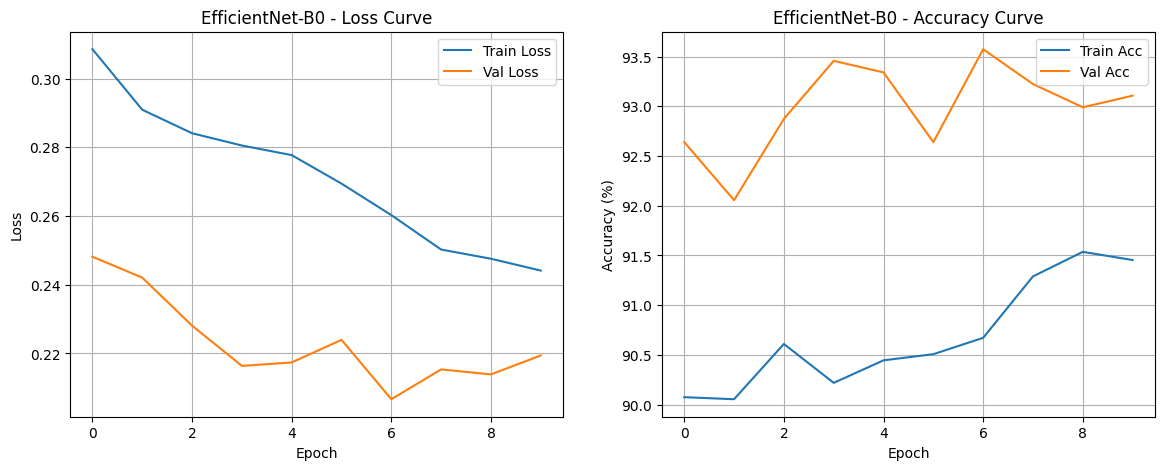

In [101]:
effnet_history = train_model(effnet, optimizer_effnet, train_loader, val_loader, epochs=10)
plot_training_curves(effnet_history, "EfficientNet-B0")


In [104]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import preprocess_image


ModuleNotFoundError: No module named 'pytorch_grad_cam'

In [105]:
import numpy as np
import cv2
import torch

def generate_gradcam(model, img_path, target_layer, class_name=""):
    model.eval()

    # Load image
    img = Image.open(img_path).convert("RGB")
    img = img.resize((224,224))
    img_np = np.array(img) / 255.0

    input_tensor = preprocess_image(img_np, mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])

    cam = GradCAM(model=model, target_layers=[target_layer], use_cuda=torch.cuda.is_available())

    # Forward pass
    grayscale_cam = cam(input_tensor=input_tensor)[0, :]

    # Overlay heatmap
    visualization = show_cam_on_image(img_np, grayscale_cam, use_rgb=True)

    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.imshow(img_np)
    plt.title(f"Original Image: {class_name}")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(visualization)
    plt.title("Grad-CAM Heatmap")
    plt.axis("off")

    plt.show()


In [106]:
target_layers = {
    "ResNet50": resnet50.layer4[-1],
    "DenseNet121": densenet.features[-1],
    "EfficientNetB0": effnet.features[-1],
    "MobileNetV2": mobilenet.features[-1][0],
    "VGG16": vgg16.features[-1]
}


In [107]:
import random

cls = "glioma"
folder = f"/content/brain_mri/Testing/{cls}"
img_path = folder + "/" + random.choice(os.listdir(folder))

print("Using image:", img_path)


Using image: /content/brain_mri/Testing/glioma/Te-gl_0171.jpg
